Kamil Koniak - s26766@pjatk.edu.pl - MLR - Raport2

Importy i redukcja ostrzeżeń

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, rand_score

warnings.filterwarnings("ignore", category=UserWarning)

Zadanie 2

- wczytanie danych z pliku csv

In [203]:
df = pd.read_csv('C:/Users/kamil/Downloads/iris2D.csv')

- sprawdzenie jakości danych

In [204]:
print("Statystyki opisowe:")
print(df.describe(), end="\n\n")
print("Braki danych (NaN):")
print(df.isna().sum(), end="\n")

Statystyki opisowe:
            index           PC1           PC2
count  150.000000  1.500000e+02  1.500000e+02
mean    74.500000  1.894781e-16  1.776357e-17
std     43.445368  1.714084e+00  9.592523e-01
min      0.000000 -2.774345e+00 -2.654073e+00
25%     37.250000 -2.102721e+00 -5.984875e-01
50%     74.500000  4.183111e-01  1.750202e-02
75%    111.750000  1.343027e+00  5.940342e-01
max    149.000000  3.310696e+00  2.686284e+00

Braki danych (NaN):
index    0
PC1      0
PC2      0
dtype: int64


- analiza jakości danych

        Dane po PCA są kompletne (brak NaN).
        
        Odchylenia standardowe: PC1 ≈ 1.714, PC2 ≈ 0.959.
        Ochylenie standardowe PC1 jest około 1.8× większe niż PC2.
        Wariancja PC1 stanowi ponad 3× wariancji PC2.
        
        Decyduję się na ponowne zeskalowanie tych dwóch wymiarów tak, by każdy miał odchylenie standardowe równe 1.
        Wykorzystam do tego StandardScaler.

- przygotowanie macierzy cech

In [205]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['PC1', 'PC2']])

- klasteryzacja algorytmu k-średnich

        ustawiam k=3 tak jak w teści zadania

        ustawiam random_state=0, otrzymujemy te same zestawy treningowe i testowe po każdym uruchomieniu

In [206]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
labels_kmeans = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

- rysowanie wykresu

        punkty z kolorami według przynależności do klastra

        centroidy jako czarne krzyżyki

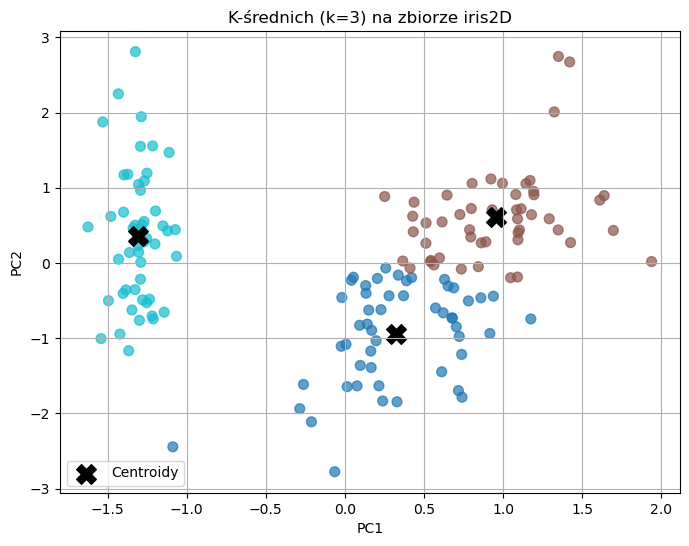

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], 
            X_scaled[:, 1], 
            c=labels_kmeans, 
            cmap='tab10', 
            s=50, 
            alpha=0.7)
plt.scatter(centroids[:, 0], 
            centroids[:, 1], 
            marker='X', 
            s=200, 
            c='black', 
            label='Centroidy')
plt.title('K-średnich (k=3) na zbiorze iris2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

Zadanie 3

- funkcja do wizualizacji

In [208]:
def plot_clusters(X, labels, title='Cluster plot'):
    unique_labels = set(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
    
    plt.figure(figsize=(8, 6))
    for lbl, col in zip(sorted(unique_labels), colors):
        mask = (labels == lbl)
        if lbl == -1:
            plt.scatter(X[mask, 0], X[mask, 1],
                        c='k', marker='x', s=50, label='Szum (-1)')
        else:
            plt.scatter(X[mask, 0], X[mask, 1],
                        c=[col], marker='o', s=50, label=f'Klaster {lbl}')
    
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Klasteryzacja DBSCAN

test 1:

promień sąsiedztwa (eps) = 0.5

minimalna liczba punktów w rdzeniu (min_samples) = 5

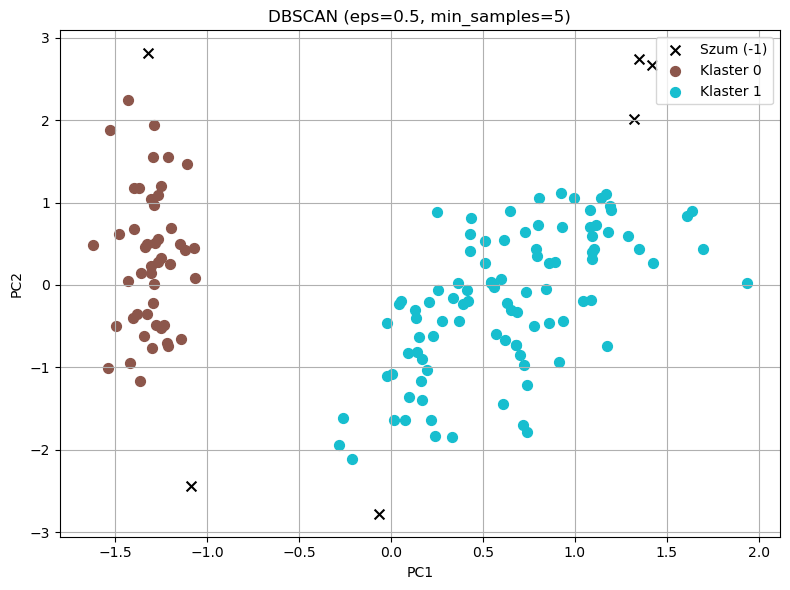

In [209]:
db = DBSCAN(eps=0.5, min_samples=5)
labels_db_test1 = db.fit_predict(X_scaled)
plot_clusters(X_scaled, labels_db_test1, title='DBSCAN (eps=0.5, min_samples=5)')

test 2:

promień sąsiedztwa (eps) = 0.3

minimalna liczba punktów w rdzeniu (min_samples) = 10

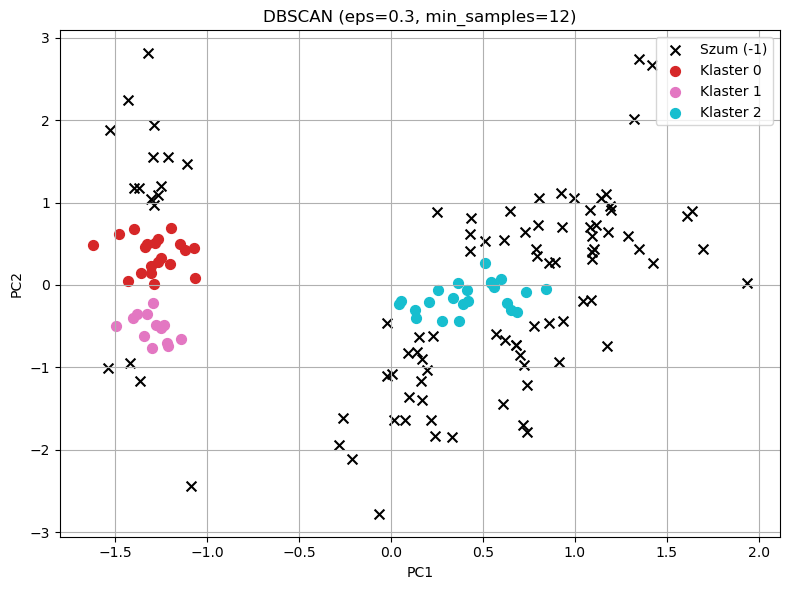

In [210]:
db = DBSCAN(eps=0.3, min_samples=12)
labels_db_test2 = db.fit_predict(X_scaled)
plot_clusters(X_scaled, labels_db_test2, title='DBSCAN (eps=0.3, min_samples=12)')

test 3:

promień sąsiedztwa (eps) = 0.4

minimalna liczba punktów w rdzeniu (min_samples) = 10

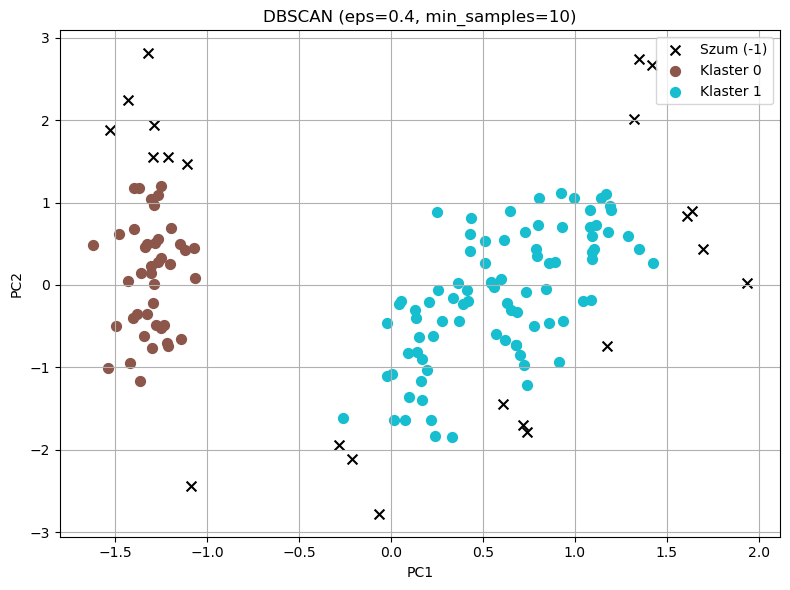

In [211]:
db = DBSCAN(eps=0.3, min_samples=5)
labels_db_test3 = db.fit_predict(X_scaled)
plot_clusters(X_scaled, labels_db_test3, title='DBSCAN (eps=0.4, min_samples=10)')

Opis algorytmu DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

- jest to algorytm klasteryzacji
- grupuje punkty na podstawie ich gęstości w przestrzeni
- punkty dzielone są na rdzeniowe, brzegowe i szum
- kluczowe są dwa parametry: eps (promień sąsiedztwa) i min_samples (minimalna liczba punktów)
- wykrywa nieliniowe klastry i automatycznie redukuje szumy
- nie wymaga podania liczby klastrów z góry, wyznacza je na podstawie struktury gęstości danych
- nie wyznacza centroidów


Zadanie 4, przygotowanie danych

- Wczytanie oryginalnych danych z pliku csv oraz przeskanowanie w poszukiwaniu braków danych

In [212]:
df_org = pd.read_csv(r'C:/Users/kamil/Downloads/irisORG.csv')
print("Braki danych (NaN):")
print(df_org.isna().sum(), end="\n")

Braki danych (NaN):
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64


- Przygotowanie wektora etykiet oraz przerobienie etykiet na wartości liczbowe

In [213]:
y_true = df_org['variety'].values
le = LabelEncoder()
y_true_encoded = le.fit_transform(y_true)

Zadanie 4, a) Czystość (purity) klastrów.
 - funkcja do obliczania czystości przy użyciu macierzy błędu

In [214]:
def compute_purity(true_labels, pred_labels):
    cm = confusion_matrix(true_labels, pred_labels)
    max_in_clusters = cm.max(axis=0)
    purity = max_in_clusters.sum() / np.sum(cm)
    return purity, cm

- przepuszczenie wynikiów algorytmów klasyfikujących przez powyższą funkcję oraz wydrukowanie wartości czystości (purity)

In [215]:
purity_km, cm_km = compute_purity(y_true_encoded, labels_kmeans)
print(f"Purity (K-Means): {purity_km:.4f}")

purity_db, cm_db = compute_purity(y_true_encoded, labels_db_test1)
print(f"Purity (DBSCAN test1): {purity_db:.4f}")

purity_db, cm_db = compute_purity(y_true_encoded, labels_db_test2)
print(f"Purity (DBSCAN test2): {purity_db:.4f}")

purity_db, cm_db = compute_purity(y_true_encoded, labels_db_test3)
print(f"Purity (DBSCAN test3): {purity_db:.4f}")

Purity (K-Means): 0.8067
Purity (DBSCAN test1): 0.6667
Purity (DBSCAN test2): 0.6267
Purity (DBSCAN test3): 0.6400


Zadanie 4, b) Zgodność klastrów z prawdziwymi klasami (Rand Index).
- przepuszczenie wynikiów algorytmów klasyfikujących przez wbudowaną funkcję rand_score

In [216]:
rand_score_kmeans = rand_score(y_true_encoded, labels_kmeans)
rand_score_dbscan_test1 = rand_score(y_true_encoded, labels_db_test1)
rand_score_dbscan_test2 = rand_score(y_true_encoded, labels_db_test2)
rand_score_dbscan_test3 = rand_score(y_true_encoded, labels_db_test3)

print(f"Rand Index (K-Means): {rand_score_kmeans:.4f}")
print(f"Rand Index (DBSCAN test1 ):  {rand_score_dbscan_test1:.4f}")
print(f"Rand Index (DBSCAN test2 ):  {rand_score_dbscan_test2:.4f}")
print(f"Rand Index (DBSCAN test3 ):  {rand_score_dbscan_test3:.4f}")


Rand Index (K-Means): 0.8107
Rand Index (DBSCAN test1 ):  0.7673
Rand Index (DBSCAN test2 ):  0.5965
Rand Index (DBSCAN test3 ):  0.7376
